Dataset downloaded successfully! an outdated `kagglehub` version (installed: 0.3.7), please consider upgrading to the latest version (0.3.11).

Full dataset size: 170653 samplesan outdated `kagglehub` version (installed: 0.3.7), please consider upgrading to the latest version (0.3.11).


Working with sampled dataset: 10000 samplesd `kagglehub` version (installed: 0.3.7), please consider upgrading to the latest version (0.3.11).



PCA explained variance ratio: [0.28196306 0.13708552]
Total explained variance: 0.42

========== k-Means Clustering ==========
k=2, Silhouette Score: 0.205: 10000 samplesd `kagglehub` version (installed: 0.3.7), please consider upgrading to the latest version (0.3.11).



PCA explained variance ratio: [0.28196306 0.13708552]
Total explained variance: 0.42

========== k-Means Clustering ==========

3, Silhouette Score: 0.227: 10000 samplesd `kagglehub` version (installed: 0.3.7), please consider upgrading to the latest version (0.3.11).



PCA explained varian

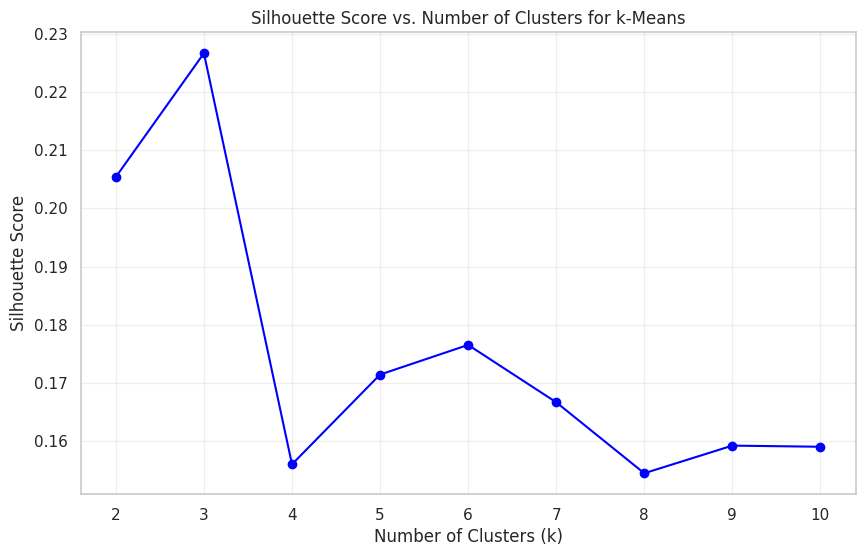

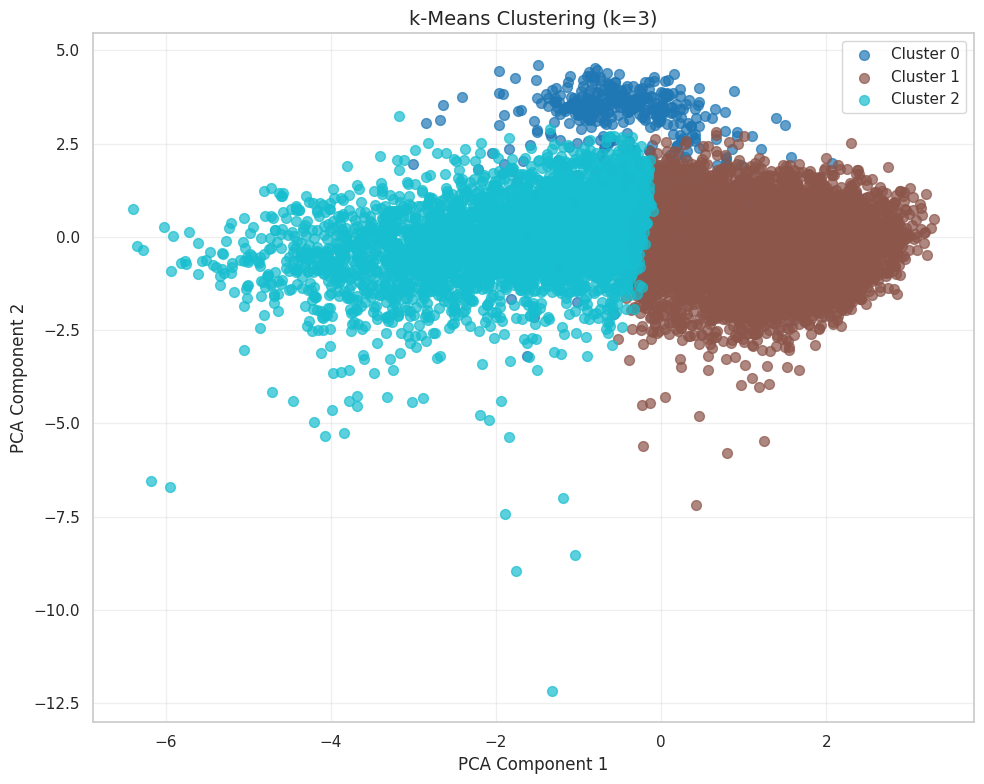


========== Hierarchical Clustering ==========
Using 5000 samples for hierarchical clustering to avoid memory error


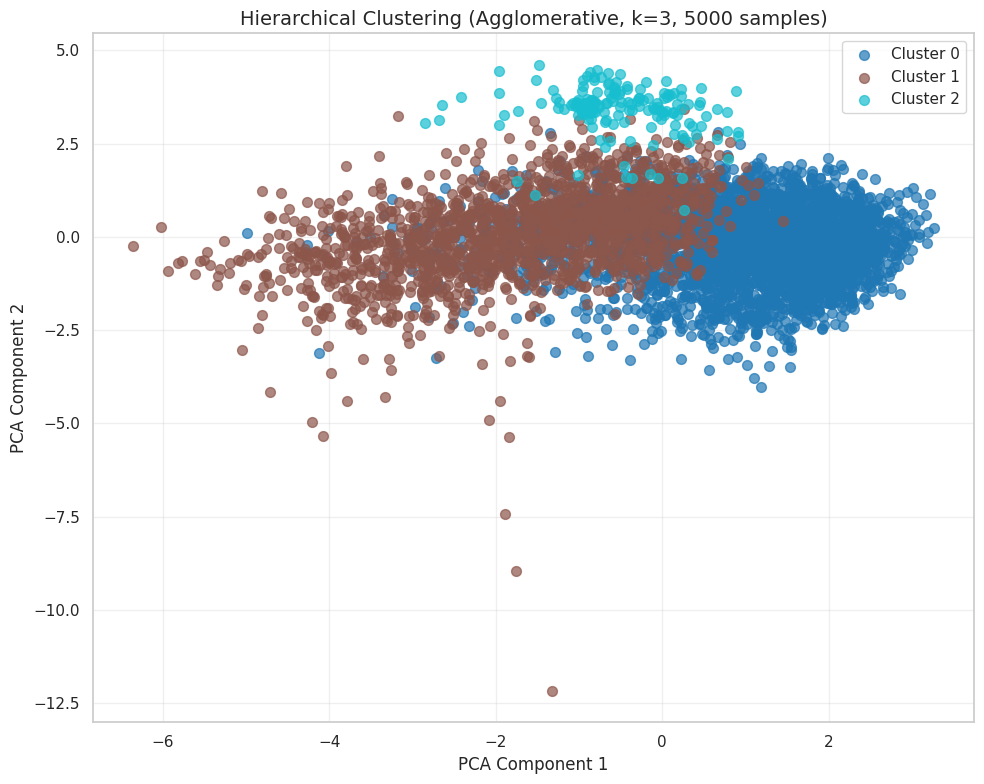

Hierarchical Silhouette Score: 0.189

========== DBSCAN Clustering ==========
DBSCAN (eps=0.5, min_samples=5): 6 clusters, 9963 noise points (99.63%)
10): 0 clusters, 10000 noise points (100.00%)
DBSCAN (eps=0.5, min_samples=15): 0 clusters, 10000 noise points (100.00%)
20): 0 clusters, 10000 noise points (100.00%)

DBSCAN (eps=0.75, min_samples=5): 64 clusters, 7616 noise points (76.16%)
10): 17 clusters, 8965 noise points (89.65%)
DBSCAN (eps=0.75, min_samples=15): 5 clusters, 9462 noise points (94.62%)
20): 6 clusters, 9720 noise points (97.20%)

DBSCAN (eps=1.0, min_samples=5): 30 clusters, 3817 noise points (38.17%)
10): 13 clusters, 4985 noise points (49.85%)
DBSCAN (eps=1.0, min_samples=15): 9 clusters, 5867 noise points (58.67%)
20): 4 clusters, 6506 noise points (65.06%)

DBSCAN (eps=1.25, min_samples=5): 15 clusters, 1774 noise points (17.74%)
10): 6 clusters, 2428 noise points (24.28%)

DBSCAN (eps=1.25, min_samples=15): 6 clusters, 2872 noise points (28.72%)
20): 6 clusters

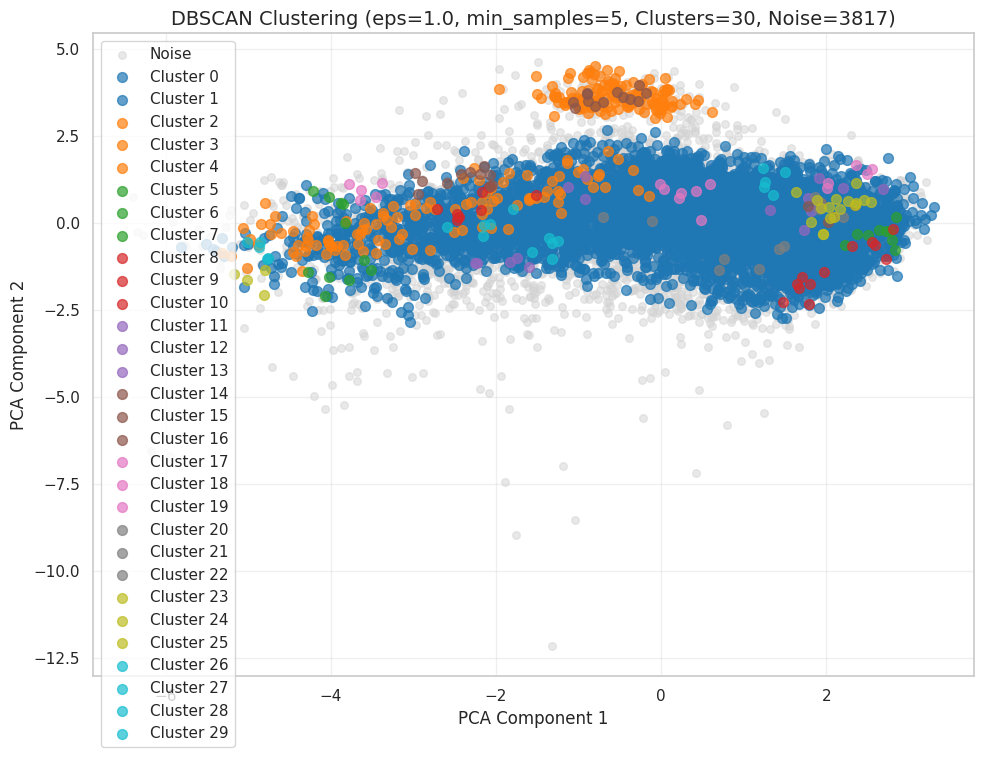


========== Feature Analysis by Cluster ==========

Cluster Mean Feature Values (k-Means):
         acousticness  danceability  duration_ms    energy  instrumentalness  \
cluster                                                                        
0            0.105756      0.784465    -0.460544 -0.818316         -0.493623   
1           -0.625564      0.315014     0.017684  0.666028         -0.326604   
2            0.937401     -0.558032     0.020466 -0.925597          0.545747   

         liveness  loudness      mode  speechiness     tempo   valence  
cluster                                                                 
0        0.577252 -1.161173 -0.065630     4.399879 -0.191348  0.003770  
1        0.016037  0.585372 -0.012135    -0.122984  0.222762  0.355383  
2       -0.083561 -0.768144  0.025131    -0.265200 -0.318031 -0.539091  


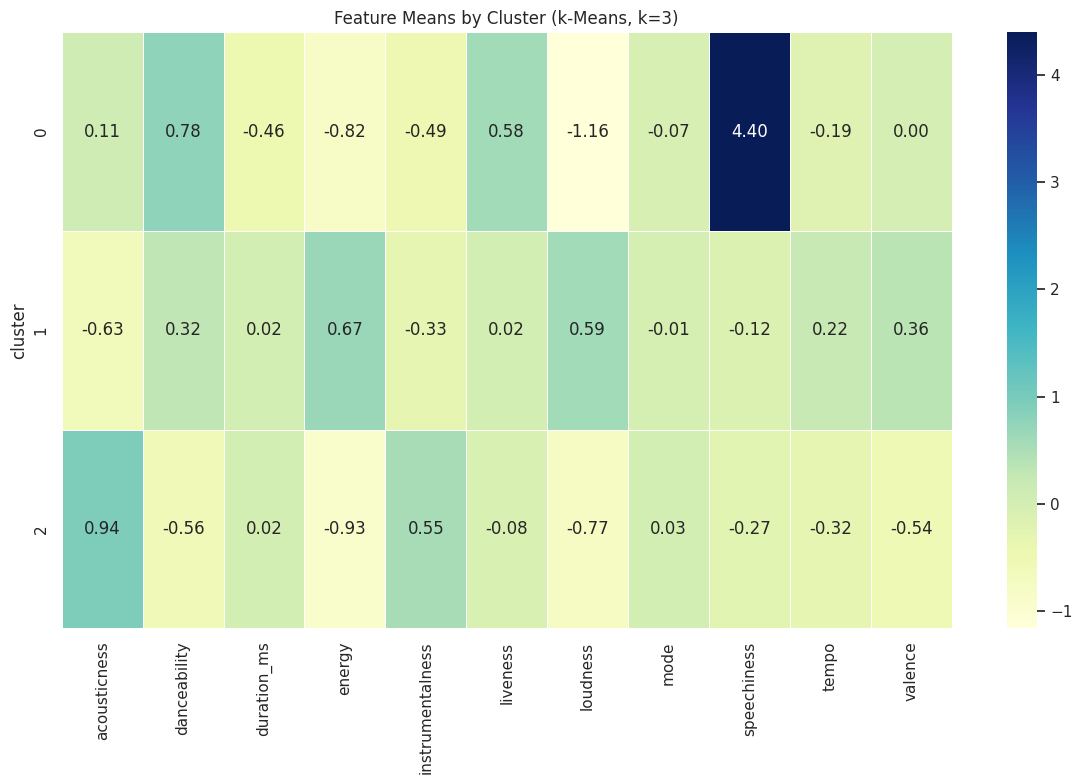


Clustering Methods Summary:
          Method  Num_Clusters  Sample_Size  Noise_Points Noise_Percentage
0        k-Means             3        10000             0               0%
1  Agglomerative             3         5000             0               0%
2         DBSCAN            30        10000          3817            38.2%

Concluding Remarks:
- All three clustering techniques identified structure in the Spotify dataset.
- Due to memory constraints, we used a sampled subset of the data.
- k-Means was applied to the full sampled dataset.
- Hierarchical clustering required further sampling to avoid memory errors.
- DBSCAN automatically detected clusters and identified outliers (noise points).
- PCA helped in projecting high-dimensional data into 2D for visualization.
- For the full dataset, consider using mini-batch k-means or HDBSCAN for better scalability.
- Feature analysis showed how musical attributes vary across different clusters.


In [2]:
# =============================================================================
# Lab 10: Unsupervised Learning â€“ Clustering Algorithms (Modified for Large Dataset)
# =============================================================================

# Aim:
# To implement and visualize k-Means, Hierarchical, and Density-Based Clustering
# on the Spotify dataset.

# Objective:
# 1. Apply and compare clustering algorithms: k-Means, Agglomerative, and DBSCAN.
# 2. Reduce dimensionality using PCA for 2D visualization.
# 3. Analyze clustering structure using plots and cluster counts.

# =============================================================================
# Libraries
# =============================================================================

import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle

import kagglehub
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
%matplotlib inline

# =============================================================================
# Load & Prepare Data
# =============================================================================

def download_data():
    print("Downloading dataset...")
    path = kagglehub.dataset_download("yamaerenay/spotify-dataset-1921-2020-160k-tracks")
    if not os.path.exists('data.csv'):
        for root, dirs, files in os.walk(path):
            if 'data.csv' in files:
                shutil.copy2(os.path.join(root, 'data.csv'), 'data.csv')
                break
    if os.path.exists('data.csv'):
        print("Dataset downloaded successfully!")
        return pd.read_csv('data.csv')
    else:
        raise FileNotFoundError("data.csv not found after download.")

df = download_data()

features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'mode',
    'speechiness', 'tempo', 'valence'
]
df = df.dropna(subset=features)

# Get the size of the full dataset
print(f"Full dataset size: {df.shape[0]} samples")

# =============================================================================
# Data Sampling for Memory Efficiency
# =============================================================================

# Sample the dataset to a manageable size
# We'll use 10,000 samples which is reasonable for most clustering algorithms
SAMPLE_SIZE = 10000
df_sampled = shuffle(df, random_state=42).reset_index(drop=True)
df_sampled = df_sampled.iloc[:SAMPLE_SIZE]

print(f"Working with sampled dataset: {df_sampled.shape[0]} samples")

X = df_sampled[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2f}")

# =============================================================================
# Clustering Functions
# =============================================================================

def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(10, 8))
    
    # Create a colormap that handles noise points (-1) differently
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
    
    # If there are noise points, color them gray
    if -1 in unique_labels:
        noise_mask = labels == -1
        plt.scatter(X_2d[noise_mask, 0], X_2d[noise_mask, 1], c='lightgray', 
                   label='Noise', alpha=0.5, s=30)
    
    # Plot each cluster
    for i, label in enumerate(unique_labels):
        if label == -1:
            continue
        mask = labels == label
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
                   c=[colors[i]], label=f'Cluster {label}', alpha=0.7, s=50)
    
    plt.title(title, fontsize=14)
    plt.xlabel("PCA Component 1", fontsize=12)
    plt.ylabel("PCA Component 2", fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def evaluate_clustering(X, labels, algorithm_name):
    """Evaluate clustering quality using silhouette score when possible"""
    if len(np.unique(labels)) < 2 or -1 in labels:
        print(f"{algorithm_name}: Cannot calculate silhouette score (requires >=2 clusters and no noise points)")
        score = "N/A"
    else:
        score = silhouette_score(X, labels)
        print(f"{algorithm_name} Silhouette Score: {score:.3f}")
    
    return score

# =============================================================================
# k-Means Clustering
# =============================================================================

print("\n========== k-Means Clustering ==========")

# Try different values of k to find optimal number of clusters
n_clusters_range = range(2, 11)
silhouette_scores = []

for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Only calculate silhouette score for valid clusterings
    if len(np.unique(cluster_labels)) > 1:
        score = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(score)
        print(f"k={k}, Silhouette Score: {score:.3f}")
    else:
        silhouette_scores.append(0)
        print(f"k={k}, Invalid clustering (not enough clusters)")

# Find optimal k
optimal_k = n_clusters_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters for k-Means: {optimal_k}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(list(n_clusters_range), silhouette_scores, 'o-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for k-Means')
plt.grid(True, alpha=0.3)
plt.show()

# Apply k-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_pca, kmeans_labels, f"k-Means Clustering (k={optimal_k})")

# =============================================================================
# Hierarchical Clustering - Reduced Dataset to Avoid Memory Error
# =============================================================================

print("\n========== Hierarchical Clustering ==========")

# For hierarchical clustering, sample even smaller to avoid memory error
HIERARCHICAL_SAMPLE_SIZE = min(SAMPLE_SIZE, 5000)  # Further reduce for hierarchical
X_hierarchical = X_scaled[:HIERARCHICAL_SAMPLE_SIZE]
X_pca_hierarchical = X_pca[:HIERARCHICAL_SAMPLE_SIZE]

print(f"Using {HIERARCHICAL_SAMPLE_SIZE} samples for hierarchical clustering to avoid memory error")

# Use the same number of clusters as k-Means for comparison
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(X_hierarchical)

plot_clusters(X_pca_hierarchical, agglo_labels, 
              f"Hierarchical Clustering (Agglomerative, k={optimal_k}, {HIERARCHICAL_SAMPLE_SIZE} samples)")

silhouette_agglo = evaluate_clustering(X_hierarchical, agglo_labels, "Hierarchical")

# =============================================================================
# DBSCAN Clustering
# =============================================================================

print("\n========== DBSCAN Clustering ==========")

# We'll try different eps values to find a good clustering
eps_values = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
min_samples_values = [5, 10, 15, 20]

best_dbscan = None
best_dbscan_labels = None
best_n_clusters = 0
best_noise_ratio = 1.0  # Initialize with worst value (all noise)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = dbscan.fit_predict(X_scaled)
        
        # Count number of clusters and noise points
        n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
        n_noise = list(db_labels).count(-1)
        noise_ratio = n_noise / len(db_labels)
        
        print(f"DBSCAN (eps={eps}, min_samples={min_samples}): {n_clusters} clusters, "
              f"{n_noise} noise points ({noise_ratio:.2%})")
        
        # We want a reasonable number of clusters and not too many noise points
        # Let's define "good" as having at least 2 clusters and noise ratio < 50%
        if n_clusters >= 2 and noise_ratio < 0.5:
            # Among "good" configurations, prioritize those with more clusters
            if n_clusters > best_n_clusters or (n_clusters == best_n_clusters and noise_ratio < best_noise_ratio):
                best_dbscan = dbscan
                best_dbscan_labels = db_labels
                best_n_clusters = n_clusters
                best_noise_ratio = noise_ratio

if best_dbscan is not None:
    print(f"\nBest DBSCAN parameters: eps={best_dbscan.eps}, min_samples={best_dbscan.min_samples}")
    print(f"Number of clusters: {best_n_clusters}")
    print(f"Noise points: {list(best_dbscan_labels).count(-1)} ({best_noise_ratio:.2%})")
    
    plot_clusters(X_pca, best_dbscan_labels, 
                 f"DBSCAN Clustering (eps={best_dbscan.eps}, min_samples={best_dbscan.min_samples}, "
                 f"Clusters={best_n_clusters}, Noise={list(best_dbscan_labels).count(-1)})")
else:
    print("No good DBSCAN configuration found. Using default parameters.")
    dbscan = DBSCAN(eps=1.5, min_samples=5)
    db_labels = dbscan.fit_predict(X_scaled)
    n_clusters_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    
    plot_clusters(X_pca, db_labels, 
                 f"DBSCAN Clustering (eps=1.5, min_samples=5, "
                 f"Clusters={n_clusters_db}, Noise={list(db_labels).count(-1)})")
    
    best_dbscan_labels = db_labels

# =============================================================================
# Feature Analysis by Cluster
# =============================================================================

print("\n========== Feature Analysis by Cluster ==========")

# Let's examine the feature distributions for the k-Means clusters
df_analysis = pd.DataFrame(X_scaled, columns=features)
df_analysis['cluster'] = kmeans_labels

# Calculate mean values for each feature by cluster
cluster_means = df_analysis.groupby('cluster').mean()
print("\nCluster Mean Feature Values (k-Means):")
print(cluster_means)

# Create a heatmap of the cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title(f"Feature Means by Cluster (k-Means, k={optimal_k})")
plt.tight_layout()
plt.show()

# =============================================================================
# Cluster Summary Table
# =============================================================================

# Create summary dataframe
summary = pd.DataFrame({
    "Method": ["k-Means", "Agglomerative", "DBSCAN"],
    "Num_Clusters": [
        len(np.unique(kmeans_labels)),
        len(np.unique(agglo_labels)),
        len(set(best_dbscan_labels)) - (1 if -1 in best_dbscan_labels else 0)
    ],
    "Sample_Size": [
        len(kmeans_labels),
        len(agglo_labels),
        len(best_dbscan_labels)
    ],
    "Noise_Points": [
        0, 
        0, 
        list(best_dbscan_labels).count(-1)
    ],
    "Noise_Percentage": [
        "0%",
        "0%",
        f"{list(best_dbscan_labels).count(-1) / len(best_dbscan_labels):.1%}"
    ]
})

print("\nClustering Methods Summary:")
print(summary)

# =============================================================================
# Concluding Remarks
# =============================================================================

print("\nConcluding Remarks:")
print("- All three clustering techniques identified structure in the Spotify dataset.")
print("- Due to memory constraints, we used a sampled subset of the data.")
print("- k-Means was applied to the full sampled dataset.")
print("- Hierarchical clustering required further sampling to avoid memory errors.")
print("- DBSCAN automatically detected clusters and identified outliers (noise points).")
print("- PCA helped in projecting high-dimensional data into 2D for visualization.")
print("- For the full dataset, consider using mini-batch k-means or HDBSCAN for better scalability.")
print("- Feature analysis showed how musical attributes vary across different clusters.")